In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [135]:
df = pd.read_csv(filepath_or_buffer='D:/Studies/Neuro/Lab 2/perceptron/cmake-build-debug/training_results.csv')
display(df)
f = open('D:/Studies/Neuro/Lab 1/norm_params.txt', 'r', newline='\n')
temp = f.read().splitlines()
g_total_min = float(temp[0])
g_total_max = float(temp[1])
kgf_min = float(temp[2])
kgf_max = float(temp[3])
df['Predicted 0'] = df['Predicted 0'] * (g_total_max - g_total_min) + g_total_min
df['Real 0'] = df['Real 0'] * (g_total_max - g_total_min) + g_total_min
df['Predicted 1'] = df['Predicted 1'] * (kgf_max - kgf_min) + kgf_min
df['Real 1'] = df['Real 1'] * (kgf_max - kgf_min) + kgf_min
display(df)

,Epoch,Predicted 0,Real 0,Predicted 1,Real 1
0,1,NaN,NaN,0.492809,0.200459
1,1,NaN,NaN,0.602125,0.271209
2,1,NaN,NaN,0.636358,0.082542
3,1,NaN,NaN,0.596390,0.090403
4,1,NaN,NaN,0.634913,0.090403
...,...,...,...,...,...
281595,3200,NaN,NaN,0.265509,0.275140
281596,3200,NaN,NaN,0.289850,0.275140
281597,3200,0.330103,0.036070,0.297122,0.432877
281598,3200,0.166138,0.237083,0.640374,0.646590


,Epoch,Predicted 0,Real 0,Predicted 1,Real 1
0,1,NaN,NaN,256.378470,181.999967
1,1,NaN,NaN,284.190204,199.999895
2,1,NaN,NaN,292.899625,152.000001
3,1,NaN,NaN,282.731128,153.999991
4,1,NaN,NaN,292.531994,153.999991
...,...,...,...,...,...
281595,3200,NaN,NaN,198.549724,201.000004
281596,3200,NaN,NaN,204.742463,201.000004
281597,3200,5.472478,3.076542,206.592576,241.130813
281598,3200,4.136404,4.714501,293.921359,295.502809


In [136]:
df_g_total = df.drop(['Predicted 1', 'Real 1'], axis=1)
df_kgf = df.drop(['Predicted 0', 'Real 0'], axis=1)
df_g_total = df_g_total.dropna()
display(df_g_total)
display(df_kgf)


,Epoch,Predicted 0,Real 0
6,1,5.325845,4.248552
10,1,7.247081,7.275186
18,1,3.899469,4.232369
19,1,4.782354,5.765092
27,1,4.013035,5.833181
...,...,...,...
281579,3200,3.974036,3.724430
281583,3200,4.869886,5.170167
281584,3200,6.973144,9.636916
281597,3200,5.472478,3.076542


,Epoch,Predicted 1,Real 1
0,1,256.378470,181.999967
1,1,284.190204,199.999895
2,1,292.899625,152.000001
3,1,282.731128,153.999991
4,1,292.531994,153.999991
...,...,...,...
281595,3200,198.549724,201.000004
281596,3200,204.742463,201.000004
281597,3200,206.592576,241.130813
281598,3200,293.921359,295.502809


# MSE

## G_total

In [137]:
def calculate_mse(column, mse_data1, data):
    for group_name1, group_data1 in data.groupby('Epoch'):
        general_pred_col1 = group_data1.iloc[:, column]
        general_real_col1 = group_data1.iloc[:, column + 1]
        mse = np.mean((general_pred_col1 - general_real_col1) ** 2)
        new_row1 = {'Epoch': group_name1, 'Value': mse}
        mse_data1 = pd.concat([mse_data1, pd.DataFrame([new_row1])], ignore_index=True)
        # print(f"Epoch {group_name}: {mse:.5f}")
    return mse_data1


mse_data = pd.DataFrame({'Epoch': [], 'Value': []})
mse_data = calculate_mse(1, mse_data, df_g_total)
display(mse_data)

,Epoch,Value
0,1.0,4.910997
1,2.0,4.900410
2,3.0,4.890027
3,4.0,4.879834
4,5.0,4.869821
...,...,...
3195,3196.0,2.459201
3196,3197.0,2.458856
3197,3198.0,2.458517
3198,3199.0,2.458175


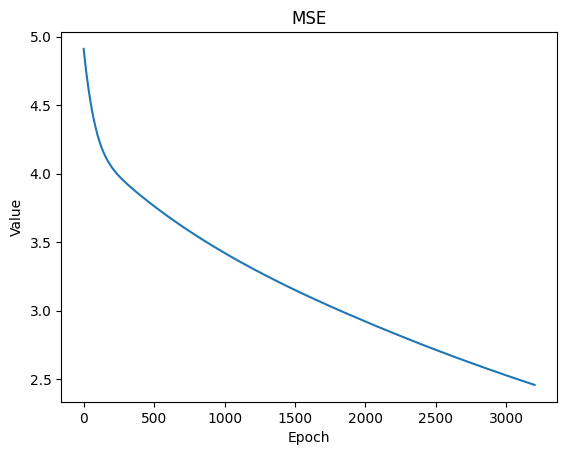

In [138]:
plt.plot(mse_data['Epoch'], mse_data['Value'])
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('MSE')
plt.show()

## КГФ

In [139]:
mse_data = pd.DataFrame({'Epoch': [], 'Value': []})
mse_data = calculate_mse(1, mse_data, df_kgf)
display(mse_data)

,Epoch,Value
0,1.0,7849.956225
1,2.0,7141.676629
2,3.0,6518.401495
3,4.0,5973.754121
4,5.0,5500.081892
...,...,...
3195,3196.0,1030.045871
3196,3197.0,1029.849548
3197,3198.0,1029.652362
3198,3199.0,1029.456221


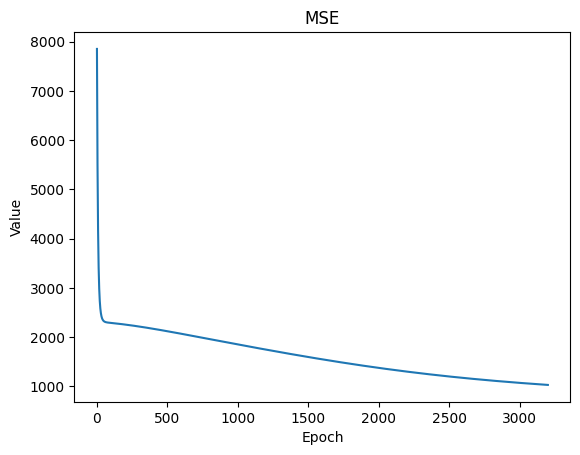

In [140]:
plt.plot(mse_data['Epoch'], mse_data['Value'])
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('MSE')
plt.show()

# MAE

## G_total

In [141]:
def calculate_mae(column, mae_data1, data):
    for group_name1, group_data1 in data.groupby('Epoch'):
        general_pred_col1 = group_data1.iloc[:, column]
        general_real_col1 = group_data1.iloc[:, column + 1]
        mae = np.mean(abs(general_pred_col1 - general_real_col1))
        new_row1 = {'Epoch': group_name1, 'Value': mae}
        mae_data1 = pd.concat([mae_data1, pd.DataFrame([new_row1])], ignore_index=True)
        # print(f"Epoch {group_name}: {mae:.5f}")
    return mae_data1


mae_data = pd.DataFrame({'Epoch': [], 'Value': []})
mae_data = calculate_mae(1, mae_data, df_g_total)
display(mae_data)

,Epoch,Value
0,1.0,1.625238
1,2.0,1.623066
2,3.0,1.620936
3,4.0,1.619932
4,5.0,1.619210
...,...,...
3195,3196.0,1.268381
3196,3197.0,1.268301
3197,3198.0,1.268223
3198,3199.0,1.268146


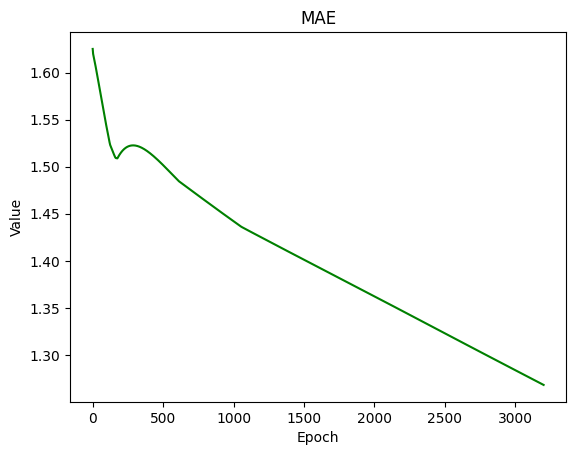

In [142]:
plt.plot(mae_data['Epoch'], mae_data['Value'], color='green')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('MAE')
plt.show()

## КГФ

In [143]:
mae_data = pd.DataFrame({'Epoch': [], 'Value': []})
mae_data = calculate_mae(1, mae_data, df_kgf)
display(mae_data)

,Epoch,Value
0,1.0,79.260172
1,2.0,75.291547
2,3.0,71.659473
3,4.0,68.345005
4,5.0,65.347459
...,...,...
3195,3196.0,24.854890
3196,3197.0,24.851648
3197,3198.0,24.848401
3198,3199.0,24.845154


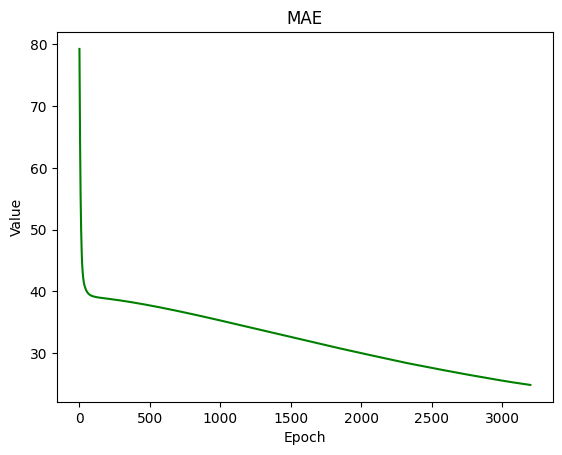

In [144]:
plt.plot(mae_data['Epoch'], mae_data['Value'], color='green')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('MAE')
plt.show()

# R_squared

## G_total

In [145]:
def r_squared(y_true, y_pred):
    ssres = np.sum((y_true - y_pred) ** 2)
    sstot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ssres / sstot)

def calculate_r_squared(column, r_squared_data1, data):
    for group_name, group_data in data.groupby('Epoch'):
        general_pred_col = group_data.iloc[:, column]
        general_real_col = group_data.iloc[:, column + 1]
        r_squared_value = r_squared(general_real_col, general_pred_col)
        # print(f"Epoch {group_name}: {r_squared_value:.5f}")
        new_row = {'Epoch': group_name, 'Value': r_squared_value}
        r_squared_data1 = pd.concat([r_squared_data1, pd.DataFrame([new_row])], ignore_index=True)
        # print(f"Epoch {group_name}: {mae:.5f}")
    return r_squared_data1

r_squared_data = pd.DataFrame({'Epoch': [], 'Value': []})
r_squared_data = calculate_r_squared(1, r_squared_data, df_g_total)
display(r_squared_data)

,Epoch,Value
0,1.0,-0.113598
1,2.0,-0.111197
2,3.0,-0.108843
3,4.0,-0.106531
4,5.0,-0.104261
...,...,...
3195,3196.0,0.442361
3196,3197.0,0.442440
3197,3198.0,0.442517
3198,3199.0,0.442594


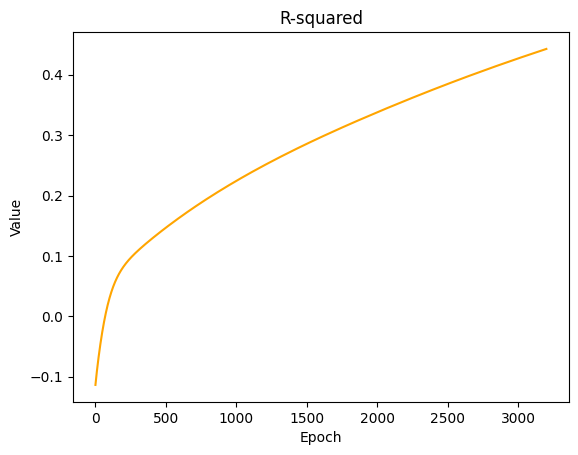

In [146]:
plt.plot(r_squared_data['Epoch'], r_squared_data['Value'], color='orange')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('R-squared')
plt.show()

## КГФ

In [147]:
r_squared_data = pd.DataFrame({'Epoch': [], 'Value': []})
r_squared_data = calculate_r_squared(1, r_squared_data, df_kgf)
display(r_squared_data)

,Epoch,Value
0,1.0,-2.385668
1,2.0,-2.080188
2,3.0,-1.811371
3,4.0,-1.576466
4,5.0,-1.372172
...,...,...
3195,3196.0,0.555744
3196,3197.0,0.555828
3197,3198.0,0.555913
3198,3199.0,0.555998


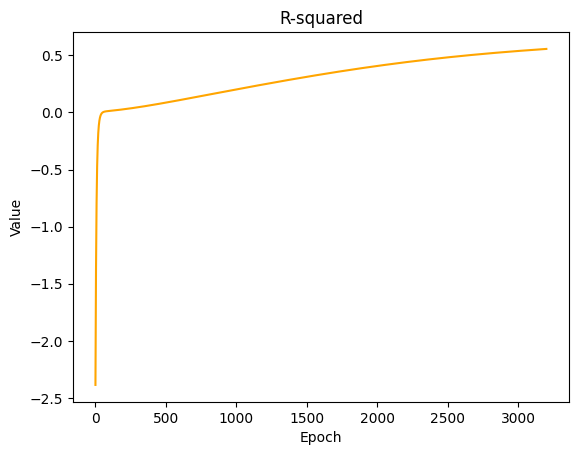

In [148]:
plt.plot(r_squared_data['Epoch'], r_squared_data['Value'], color='orange')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('R-squared')
plt.show()

In [149]:
df2 = pd.read_csv(filepath_or_buffer='D:/Studies/Neuro/Lab 2/perceptron/cmake-build-debug/testing_results.csv')
display(df2)

,Number,Predicted 0,Real 0,Predicted 1,Real 1
0,0,0.183587,0.112310,0.525239,0.619459
1,1,0.301839,0.212609,0.438187,0.462984
2,2,0.487984,0.298833,0.310002,0.363810
3,3,0.604895,0.365989,0.321312,0.362043
4,4,0.479936,0.803206,0.313402,0.621752


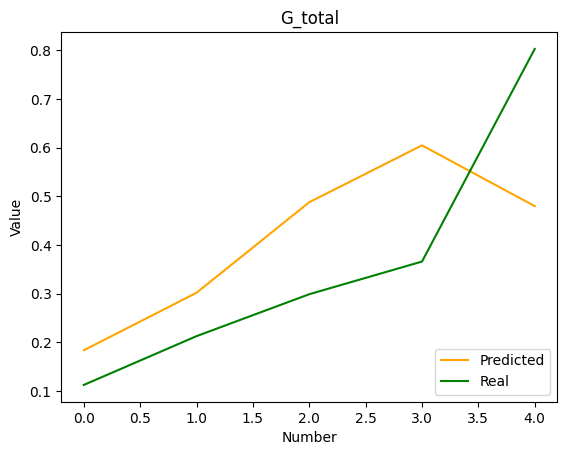

In [150]:
plt.plot(df2['Number'], df2['Predicted 0'], color='orange')
plt.plot(df2['Real 0'], color='green')
plt.xlabel('Number')
plt.ylabel('Value')
plt.title('G_total')
plt.legend(["Predicted", "Real"], loc="lower right")
plt.show()

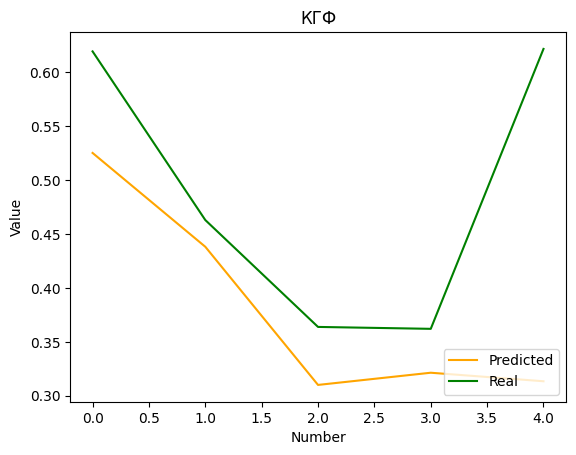

In [151]:
plt.plot(df2['Number'], df2['Predicted 1'], color='orange')
plt.plot(df2['Real 1'], color='green')
plt.xlabel('Number')
plt.ylabel('Value')
plt.title('КГФ')
plt.legend(["Predicted", "Real"], loc="lower right")
plt.show()